In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import matplotlib.font_manager as fm
import matplotlib
import time


In [2]:
import warnings
warnings.filterwarnings("ignore")  # 忽略所有警告

# **TWSE API抓取**

In [3]:
# 將民國年轉換為西元年
def convert_to_ad(date_str):
    # 將民國年轉換為西元年
    parts = date_str.split('/')
    parts[0] = str(int(parts[0]) + 1911)  # 民國轉西元 (例如 112 + 1911 = 2023)
    return '/'.join(parts)

In [4]:
# 定義函數來抓取指定月份的股票數據
def fetch_stock_data(date, stock_no):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_no}"
    response = requests.get(url)
    data = response.json()
    return pd.DataFrame(data['data'], columns=data['fields'])

In [5]:
def fetch_multiple_months(stock_id, start_year, start_month, end_year, end_month):
    all_data = []

    # 從起始年月到結束年月逐月抓取
    year,month = start_year, start_month

    while (year < end_year) or (year == end_year and month <= end_month):
        # 格式化日期
        date = f"{year}{str(month).zfill(2)}01"
        print(f"Fetching data for {year}-{str(month).zfill(2)}")
        # 抓取當前月份的數據
        df = fetch_stock_data(date, stock_id)

        # 將數據添加到列表中
        if df is not None:
            all_data.append(df)

        time.sleep(1)

        # 移動到下一個月
        month += 1
        if month > 12:
            month = 1
            year += 1

    # 將每月資料合併成一個 DataFrame
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return pd.DataFrame()

df = fetch_multiple_months('6214', 2020, 1, 2024, 9)
print(df)

Fetching data for 2020-01
Fetching data for 2020-02
Fetching data for 2020-03
Fetching data for 2020-04
Fetching data for 2020-05
Fetching data for 2020-06
Fetching data for 2020-07
Fetching data for 2020-08
Fetching data for 2020-09
Fetching data for 2020-10
Fetching data for 2020-11
Fetching data for 2020-12
Fetching data for 2021-01
Fetching data for 2021-02
Fetching data for 2021-03
Fetching data for 2021-04
Fetching data for 2021-05
Fetching data for 2021-06
Fetching data for 2021-07
Fetching data for 2021-08
Fetching data for 2021-09
Fetching data for 2021-10
Fetching data for 2021-11
Fetching data for 2021-12
Fetching data for 2022-01
Fetching data for 2022-02
Fetching data for 2022-03
Fetching data for 2022-04
Fetching data for 2022-05
Fetching data for 2022-06
Fetching data for 2022-07
Fetching data for 2022-08
Fetching data for 2022-09
Fetching data for 2022-10
Fetching data for 2022-11
Fetching data for 2022-12
Fetching data for 2023-01
Fetching data for 2023-02
Fetching dat

In [6]:
# 資料處理，將日期轉換為正確格式
df['日期'] = df['日期'].apply(convert_to_ad)
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))

# 重新命名欄位
df.rename(columns={
    '日期': 'Date',
    '開盤價': 'Open',
    '最高價': 'High',
    '最低價': 'Low',
    '收盤價': 'Close',
    '成交股數': 'Volume'
}, inplace=True)

print(df)

           Date  Volume      成交金額   Open   High    Low  Close  漲跌價差  成交筆數
0    2020-01-02  196298  14836061   75.8   75.8   75.4   75.4  -0.1   164
1    2020-01-03  238643  17979284   75.5   75.8   75.1   75.2  -0.2   197
2    2020-01-06  390674  29199308   75.0   75.1   74.5   74.5  -0.7   297
3    2020-01-07  328176  24410088   74.6   74.8   74.0   74.5   0.0   284
4    2020-01-08  381909  28288643   74.2   74.5   73.8   74.3  -0.2   292
...         ...     ...       ...    ...    ...    ...    ...   ...   ...
1149 2024-09-24  439562  56211736  130.0  130.0  127.0  127.0  -3.0   515
1150 2024-09-25  363389  46479740  128.0  129.0  127.0  127.0   0.0   531
1151 2024-09-26  296012  37987580  128.5  129.5  127.5  127.5   0.5   373
1152 2024-09-27  387013  49504853  128.0  128.5  127.0  127.5   0.0   366
1153 2024-09-30  449067  57157815  127.5  128.5  126.5  127.0  -0.5   374

[1154 rows x 9 columns]


<Figure size 1000x600 with 0 Axes>

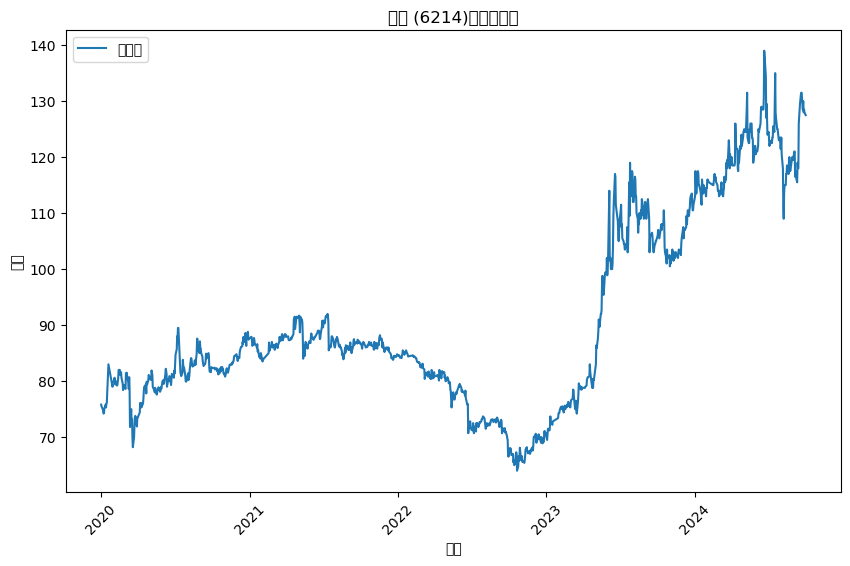

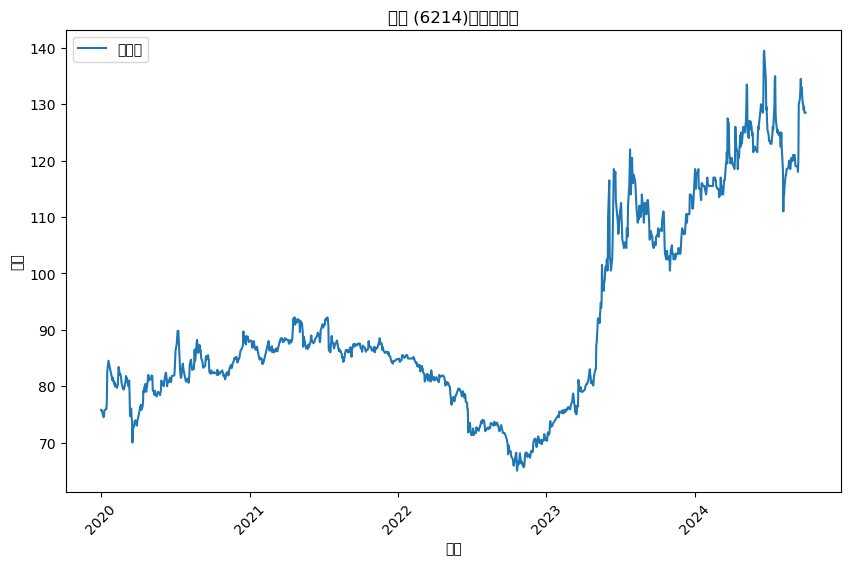

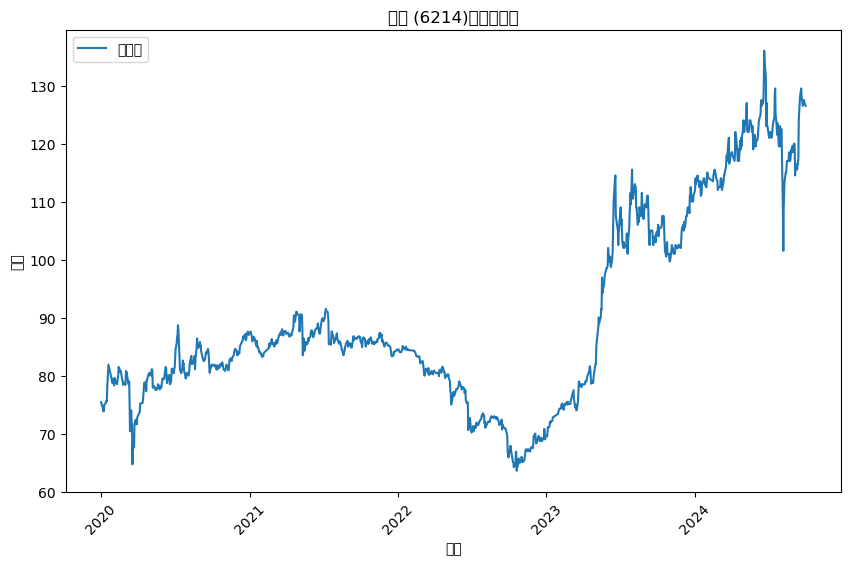

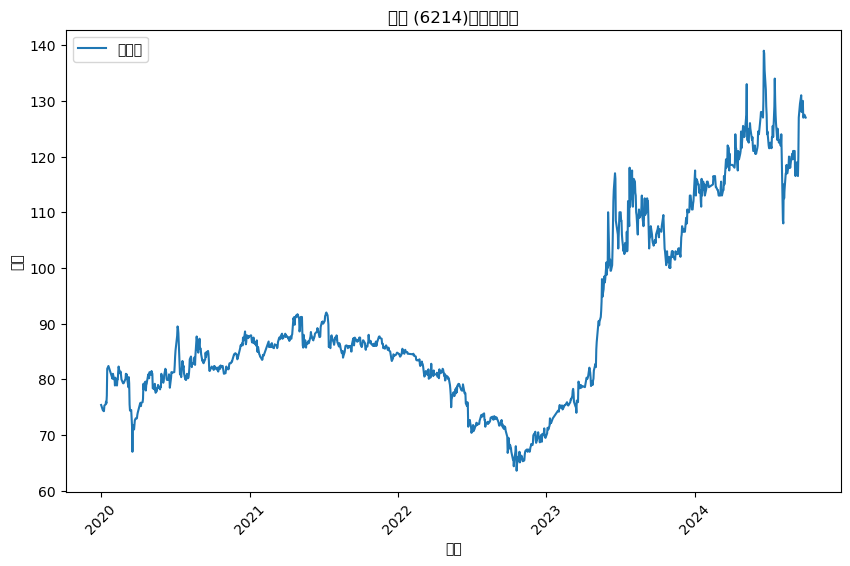

In [7]:
# 定義一個繪製函數
def plot_stock_data(df, column_name, label_name, stock_name):
  plt.figure(figsize=(10, 6))
  plt.plot(df['Date'], df[column_name], label=label_name)
  # 設定圖表標題和軸標籤
  plt.title(f'{stock_name}每日{label_name}')
  plt.xlabel('日期')
  plt.ylabel('價格')
  plt.xticks(rotation=45)
  plt.legend()
  plt.show()

# 繪製收盤價圖表
plt.figure(figsize=(10, 6))
# 使用定義的函數繪製各個欄位
plot_stock_data(df, 'Open', '開盤價', '精誠 (6214)')
plot_stock_data(df, 'High', '最高價', '精誠 (6214)')
plot_stock_data(df, 'Low', '最低價', '精誠 (6214)')
plot_stock_data(df, 'Close', '收盤價', '精誠 (6214)')

# **Yahoo 奇摩抓取股票資料**

In [8]:
import yfinance as yf

# 從 Yahoo Finance 抓取股票數據 (以 AAPL 為例)
df_yahoo = yf.download('AAPL', start='2020-01-01', end='2024-09-30')

df_yahoo.reset_index(inplace=True)

# 顯示數據
print(df_yahoo)


[*********************100%***********************]  1 of 1 completed

Price                       Date   Adj Close       Close        High  \
Ticker                                  AAPL        AAPL        AAPL   
0      2020-01-02 00:00:00+00:00   72.796021   75.087502   75.150002   
1      2020-01-03 00:00:00+00:00   72.088295   74.357498   75.144997   
2      2020-01-06 00:00:00+00:00   72.662712   74.949997   74.989998   
3      2020-01-07 00:00:00+00:00   72.320969   74.597504   75.224998   
4      2020-01-08 00:00:00+00:00   73.484344   75.797501   76.110001   
...                          ...         ...         ...         ...   
1188   2024-09-23 00:00:00+00:00  226.221115  226.470001  229.449997   
1189   2024-09-24 00:00:00+00:00  227.120117  227.369995  229.350006   
1190   2024-09-25 00:00:00+00:00  226.121216  226.369995  227.289993   
1191   2024-09-26 00:00:00+00:00  227.269958  227.520004  228.500000   
1192   2024-09-27 00:00:00+00:00  227.539658  227.789993  229.520004   

Price          Low        Open     Volume  
Ticker        AAPL 

<Figure size 1000x600 with 0 Axes>

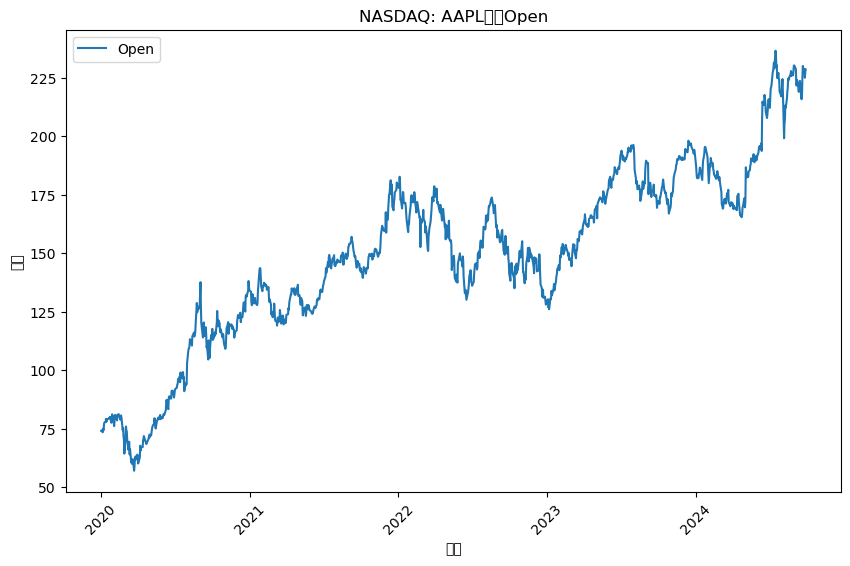

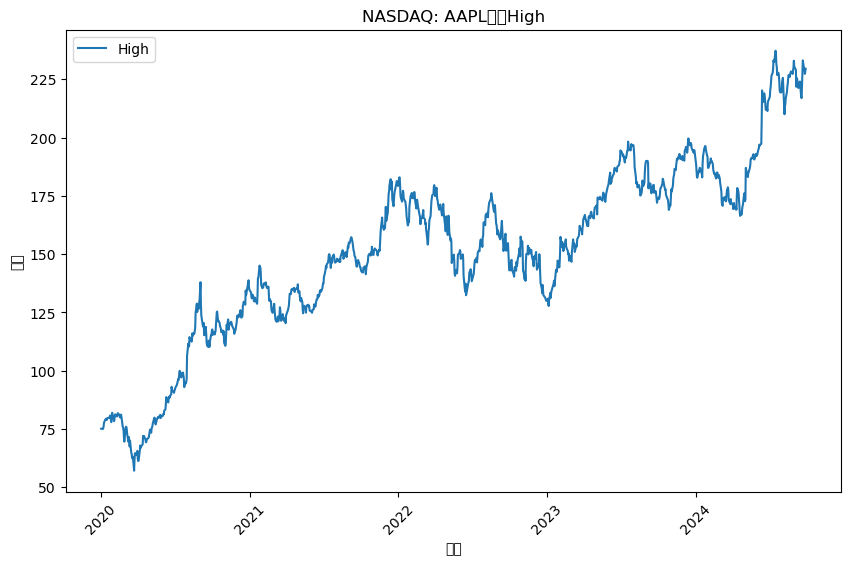

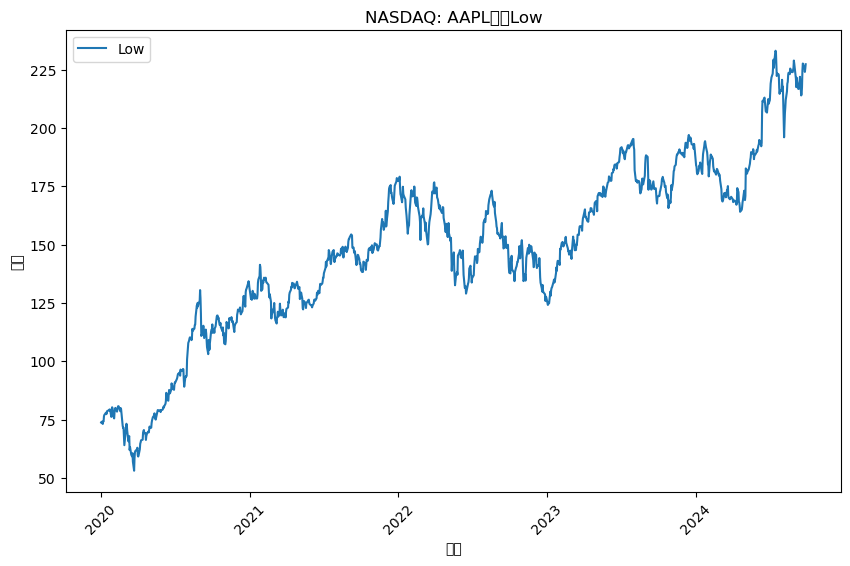

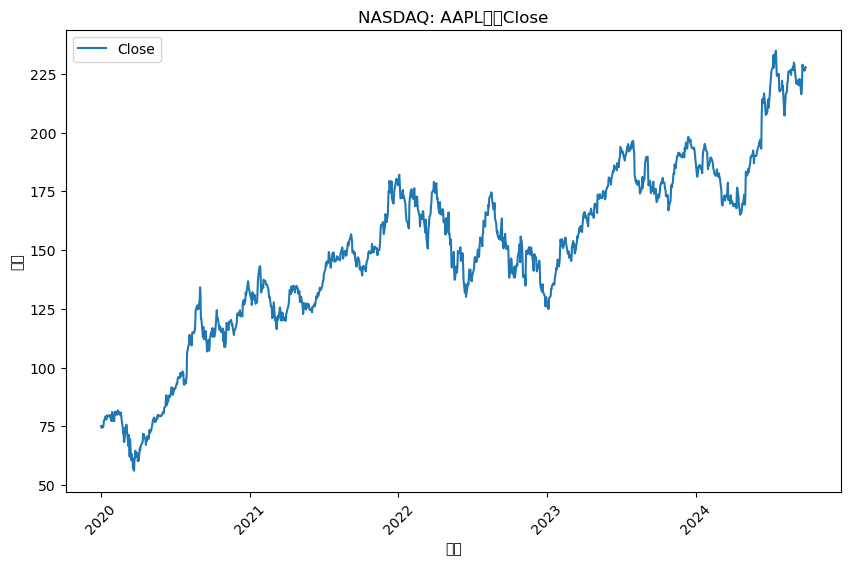

In [9]:
# 繪製收盤價圖表
plt.figure(figsize=(10, 6))
# 使用定義的函數繪製各個欄位
plot_stock_data(df_yahoo, 'Open', 'Open', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'High', 'High', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'Low', 'Low', 'NASDAQ: AAPL')
plot_stock_data(df_yahoo, 'Close', 'Close', 'NASDAQ: AAPL')

# **資料構建**

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM, Concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
import mplfinance as mpf
import os
import random

In [11]:
# 定義技術指標計算函數
def calculate_technical_indicators(df):

    # 計算簡單移動平均線(SMA)
    df['SMA_20'] = df['Close'].rolling(window=20).mean()

    # 計算相對強弱指標(RSI)
    def calculate_RSI(data, window=14):
        delta = data.diff(1)
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
        RS = gain / loss
        return 100 - (100 / (1 + RS))

    df['RSI_14'] = calculate_RSI(df['Close'], window=14)

    # 計算MACD
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    return df

# 假設 df 是你的股票資料 DataFrame
df = calculate_technical_indicators(df)

# 顯示包含技術指標的數據
print(df[['SMA_20', 'RSI_14', 'MACD', 'Signal_Line']])

       SMA_20     RSI_14      MACD  Signal_Line
0         NaN        NaN  0.000000     0.000000
1         NaN        NaN -0.015954    -0.003191
2         NaN        NaN -0.084113    -0.019375
3         NaN        NaN -0.136555    -0.042811
4         NaN        NaN -0.192040    -0.072657
...       ...        ...       ...          ...
1149  122.525  59.375000  2.555539     1.578535
1150  122.875  67.857143  2.471274     1.757083
1151  123.225  69.642857  2.416978     1.889062
1152  123.625  67.307692  2.346894     1.980628
1153  123.925  65.384615  2.225354     2.029573

[1154 rows x 4 columns]


In [12]:
# 假設 df 是你的股票資料 DataFrame
df_yahoo = calculate_technical_indicators(df_yahoo)

# 顯示包含技術指標的數據
print(df_yahoo[['SMA_20', 'RSI_14', 'MACD', 'Signal_Line']])

Price       SMA_20     RSI_14      MACD Signal_Line
Ticker                                             
0              NaN        NaN  0.000000    0.000000
1              NaN        NaN -0.058234   -0.011647
2              NaN        NaN -0.055930   -0.020503
3              NaN        NaN -0.081607   -0.032724
4              NaN        NaN -0.005068   -0.027193
...            ...        ...       ...         ...
1188    223.680001  56.174900  0.730428    0.305406
1189    223.689501  61.264678  0.973629    0.439051
1190    223.606501  57.022165  1.073304    0.565901
1191    223.658001  61.964287  1.230904    0.698902
1192    223.558001  62.207231  1.361890    0.831499

[1193 rows x 4 columns]


In [13]:
# 定義標記資料的函數
def label_data(df):
    # 初始化標記欄位
    df['Label'] = 0  # 預設標記為「跌」

    # 計數器，用來計算符合「漲」條件的指標個數
    df['count_up'] = 0  # 計算符合「漲」條件的指標

    # 條件 1：SMA 趨勢判斷
    df.loc[df['Close'] > df['SMA_20'], 'count_up'] += 1  # 當前價格高於 SMA，視為「漲」

    # 條件 2：RSI 超買/超賣判斷
    df.loc[df['RSI_14'] < 30, 'count_up'] += 1  # RSI 低於 30，視為「漲」
    df.loc[df['RSI_14'] > 70, 'count_up'] -= 1  # RSI 超過 70，視為「跌」

    # 條件 3：MACD 趨勢判斷
    df.loc[df['MACD'] > df['Signal_Line'], 'count_up'] += 1  # MACD 線在 Signal 線之上，視為「漲」
    df.loc[df['MACD'] < df['Signal_Line'], 'count_up'] -= 1  # MACD 線在 Signal 線之下，視為「跌」

    # 確定最終標記
    df['Label'] = df['count_up'].apply(lambda x: 1 if x > 0 else 0)  # 如果計數結果大於 0，標記為「漲」，否則為「跌」

    # 移除計數欄位以清潔資料
    df.drop(columns=['count_up'], inplace=True)

    return df

df = label_data(df)  # 標記資料

# 顯示標記後的數據
print(df[['Close', 'SMA_20', 'RSI_14', 'MACD', 'Signal_Line', 'Label']])

      Close   SMA_20     RSI_14      MACD  Signal_Line  Label
0      75.4      NaN        NaN  0.000000     0.000000      0
1      75.2      NaN        NaN -0.015954    -0.003191      0
2      74.5      NaN        NaN -0.084113    -0.019375      0
3      74.5      NaN        NaN -0.136555    -0.042811      0
4      74.3      NaN        NaN -0.192040    -0.072657      0
...     ...      ...        ...       ...          ...    ...
1149  127.0  122.525  59.375000  2.555539     1.578535      1
1150  127.0  122.875  67.857143  2.471274     1.757083      1
1151  127.5  123.225  69.642857  2.416978     1.889062      1
1152  127.5  123.625  67.307692  2.346894     1.980628      1
1153  127.0  123.925  65.384615  2.225354     2.029573      1

[1154 rows x 6 columns]


In [14]:
df_yahoo.columns = df_yahoo.columns.get_level_values(0)
df_yahoo = label_data(df_yahoo)  # 標記資料

# 顯示標記後的數據
print(df_yahoo[['Close', 'SMA_20', 'RSI_14', 'MACD', 'Signal_Line', 'Label']])

Price       Close      SMA_20     RSI_14      MACD  Signal_Line  Label
0       75.087502         NaN        NaN  0.000000     0.000000      0
1       74.357498         NaN        NaN -0.058234    -0.011647      0
2       74.949997         NaN        NaN -0.055930    -0.020503      0
3       74.597504         NaN        NaN -0.081607    -0.032724      0
4       75.797501         NaN        NaN -0.005068    -0.027193      1
...           ...         ...        ...       ...          ...    ...
1188   226.470001  223.680001  56.174900  0.730428     0.305406      1
1189   227.369995  223.689501  61.264678  0.973629     0.439051      1
1190   226.369995  223.606501  57.022165  1.073304     0.565901      1
1191   227.520004  223.658001  61.964287  1.230904     0.698902      1
1192   227.789993  223.558001  62.207231  1.361890     0.831499      1

[1193 rows x 6 columns]


Open           1.000000
High           0.998338
Low            0.998106
Close          0.996738
SMA_20         0.986109
Signal_Line    0.338324
MACD           0.330784
Volume         0.247193
RSI_14         0.106450
Name: Open, dtype: float64


Close          1.000000
Low            0.998548
High           0.998256
Open           0.996738
SMA_20         0.985643
Signal_Line    0.333558
MACD           0.328518
Volume         0.245197
RSI_14         0.118216
Name: Close, dtype: float64


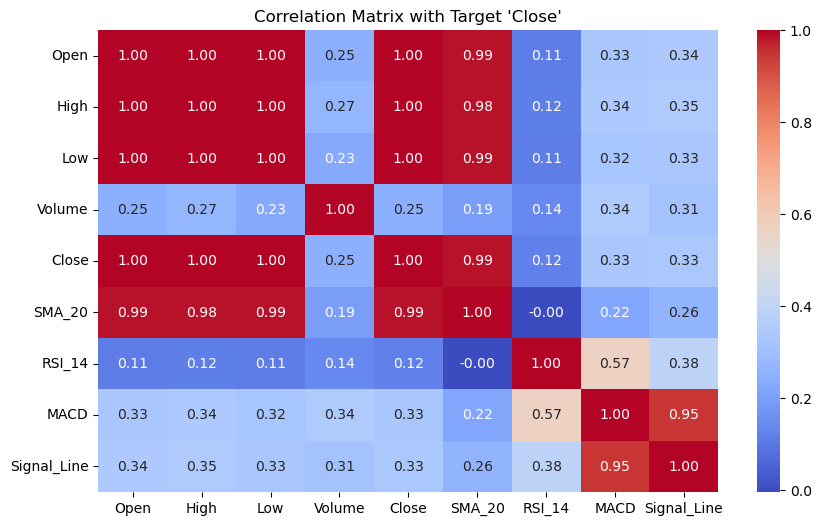

In [15]:
# 計算相關性矩陣
corr_matrix = df[['Open','High', 'Low', 'Volume', 'Close', 'SMA_20', 'RSI_14', 'MACD', 'Signal_Line']].corr()

# 顯示與目標之間的相關性
print(corr_matrix['Open'].sort_values(ascending=False))
print("\n")
print(corr_matrix['Close'].sort_values(ascending=False))

# 繪製相關性圖
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0)
plt.title("Correlation Matrix with Target 'Close'")
plt.grid(False)
plt.show()

Price
Open           1.000000
High           0.999238
Low            0.999238
Close          0.998291
SMA_20         0.985956
Signal_Line    0.231748
MACD           0.216590
RSI_14         0.027482
Volume        -0.628374
Name: Open, dtype: float64


Price
Close          1.000000
High           0.999228
Low            0.999222
Open           0.998291
SMA_20         0.984928
Signal_Line    0.228662
MACD           0.216468
RSI_14         0.038099
Volume        -0.629403
Name: Close, dtype: float64


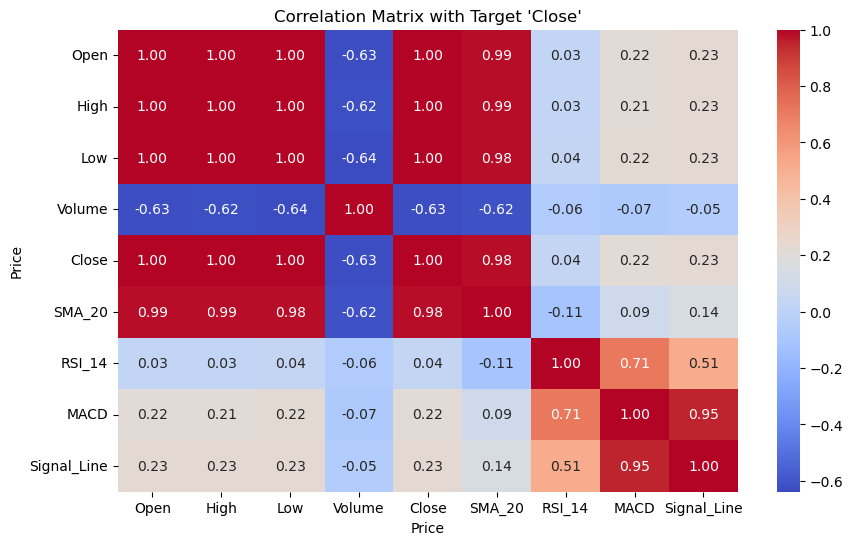

In [16]:
# 計算相關性矩陣
corr_matrix = df_yahoo[['Open','High', 'Low', 'Volume', 'Close', 'SMA_20', 'RSI_14', 'MACD', 'Signal_Line']].corr()

# 顯示與目標之間的相關性
print(corr_matrix['Open'].sort_values(ascending=False))
print("\n")
print(corr_matrix['Close'].sort_values(ascending=False))

# 繪製相關性圖
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0)
plt.title("Correlation Matrix with Target 'Close'")
plt.grid(False)
plt.show()


In [17]:
# 保存 K 線圖的函數
def save_kline_images(df, save_dir):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    labels = []
    for i in range(len(df) - 10):
        sample_df = df.iloc[i:i + 10].copy()
        sample_df['Date'] = pd.to_datetime(sample_df.index)  # 將索引轉換為日期格式
        sample_df.set_index('Date', inplace=True)
        save_path = os.path.join(save_dir, f'kline_{i+10}.png')
        mpf.plot(sample_df, type='candle', style='yahoo', savefig=save_path)
        labels.append(df.iloc[i+10]['Label'])

    return labels
labels_df = save_kline_images(df, 'kline_images')

In [18]:
labels_yahoo = save_kline_images(df_yahoo, 'kline_yahoo_images')

# **多模態模型**

In [19]:
def create_dataset(features, target, look_back=10):
    X, Y = [], []
    for i in range(len(features) - look_back):
        # X 為 look_back 天的多個特徵數據
        X.append(features[i:i + look_back])
        # Y 為對應的單一天的目標變量
        Y.append(target[i + look_back])
    return np.array(X), np.array(Y)

# LSTM 模型：處理股價數據
def create_lstm_branch(input_shape):
    lstm_input = Input(shape=input_shape, name="lstm_input")
    y = LSTM(256, return_sequences=True)(lstm_input)
    y = Dropout(0.2)(y)
    y = LSTM(256, return_sequences=True)(y)
    y = Dropout(0.2)(y)
    y = LSTM(256)(y)
    y = Dropout(0.2)(y)
    y = Dense(128, activation='relu')(y)
    return lstm_input, y

# 設置 EarlyStopping 回調函數
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [20]:
def create_cnn_branch(input_shape):
    cnn_input = Input(shape=input_shape, name="cnn_input")
    x = Conv2D(32, (3, 3), activation='relu')(cnn_input)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    return cnn_input, x

In [21]:
def load_images_and_labels(image_dir, labels=None, image_size=(64, 64)):
    images = []
    for i, label in enumerate(labels):
        img_path = f"{image_dir}/kline_{i+10}.png"
        img = load_img(img_path, target_size=image_size, color_mode='rgb')
        img_array = img_to_array(img) / 255.0  # 正規化
        images.append(img_array)

    X = np.array(images)
    y = to_categorical(np.array(labels))  # 將標籤轉為分類格式
    return X, y

# 加載圖片和標籤
X_df, y_df = load_images_and_labels('kline_images', labels=labels_df)

In [22]:
X_yahoo, y_yahoo = load_images_and_labels('kline_yahoo_images', labels=labels_yahoo)

In [23]:
def train_data_split(df, look_back=10):
    # 移除缺失值
    df = df.dropna()

    # 新增時間特徵
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Weekday'] = df['Date'].dt.weekday

    # 去除 'Open' 和 'Close' 欄位的特徵，以及相關度低的volume欄位
    features = ['High', 'Low', 'Volume', 'Year', 'Month', 'Weekday', 'SMA_20', 'RSI_14', 'MACD']

    train_size = int(len(df) * 0.8)
    train_data = df[:train_size]
    test_data = df[train_size:]

    # 特徵標準化（分別對訓練集和測試集進行標準化）
    scaler_features = MinMaxScaler()
    scaled_train_features = scaler_features.fit_transform(train_data[features])
    scaled_test_features = scaler_features.transform(test_data[features])

    # 開盤價和收盤價標準化
    scaler_open = MinMaxScaler()
    scaler_close = MinMaxScaler()

    y_train_open_scaled = scaler_open.fit_transform(train_data[['Open']])
    y_test_open_scaled = scaler_open.transform(test_data[['Open']])

    y_train_close_scaled = scaler_close.fit_transform(train_data[['Close']])
    y_test_close_scaled = scaler_close.transform(test_data[['Close']])

   # 創建 LSTM 模型所需的資料集
    X_train, y_train_open_scaled = create_dataset(scaled_train_features, y_train_open_scaled, look_back)
    X_test, y_test_open_scaled = create_dataset(scaled_test_features, y_test_open_scaled, look_back)

    _, y_train_close_scaled = create_dataset(scaled_train_features, y_train_close_scaled, look_back)
    _, y_test_close_scaled = create_dataset(scaled_test_features, y_test_close_scaled, look_back)

    # 重塑數據以符合 LSTM 或 Transformer 模型的輸入格式（即 [樣本數, 序列長度, 特徵數]）
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], len(features))
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], len(features))

    # 調整標籤形狀為 (N,)
    y_train_open_scaled = y_train_open_scaled.ravel()
    y_test_open_scaled = y_test_open_scaled.ravel()
    y_train_close_scaled = y_train_close_scaled.ravel()
    y_test_close_scaled = y_test_close_scaled.ravel()

    return X_train, y_train_open_scaled, X_test, y_test_open_scaled, y_train_close_scaled, y_test_close_scaled, train_data, test_data, scaler_open, scaler_close

In [24]:
# 結合 CNN 和 LSTM
def build_fusion_model(cnn_input_shape, lstm_input_shape, output_dim):
    # CNN 分支
    cnn_input, cnn_output = create_cnn_branch(cnn_input_shape)

    # LSTM 分支
    lstm_input, lstm_output = create_lstm_branch(lstm_input_shape)

    # 中期融合
    cnn_output = Dense(64, activation='relu')(cnn_output)  # 壓縮 CNN 輸出
    lstm_output = Dense(64, activation='relu')(lstm_output)  # 壓縮 LSTM 輸出


    merged = Concatenate()([cnn_output, lstm_output])
    z = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(merged)
    z = Dropout(0.3)(z)
    z = Dense(256)(z)
    z = Dense(128)(z)
    z = Dense(output_dim, activation='softmax' if output_dim > 1 else 'linear', name="output")(z)  # 分類或回歸

    # 建立最終模型
    model = Model(inputs=[cnn_input, lstm_input], outputs=z)
    return model

In [25]:
def mean_absolute_percentage_error(y_true, y_pred, clip_value=100):
    """計算 MAPE，加入平滑項與裁剪"""
    epsilon = 1e-5  # 平滑項
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = np.abs((y_true - y_pred) / (y_true + epsilon)) * 100
    diff = np.clip(diff, 0, clip_value)  # 對差異進行裁剪
    return np.mean(diff)


In [26]:
def evaluate_model_performance(model, X_train, y_train, X_test, y_test):
    # 訓練集評估
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # 測試集評估
    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Training MSE: {train_mse}, Test MSE: {test_mse}")
    print(f"Training MAE: {train_mae}, Test MAE: {test_mae}")
    print(f"Training MAPE: {train_mape}%, Test MAPE: {test_mape}%")
    print(f"Training R²: {train_r2}, Test R²: {test_r2}")

    return train_mse, test_mse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2

In [27]:
# 評估模型表現
def evaluate_and_store_results(model_name, model, X_train_scaled, y_train, X_test_scaled, y_test, results, key_prefix):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # 評估模型表現
    train_mse, test_mse, train_mae, test_mae, train_mape, test_mape, train_r2, test_r2 = evaluate_model_performance(
        model, X_train_scaled, y_train, X_test_scaled, y_test)

    # 將結果存入字典
    results[model_name] = {
        f'Train_MSE_{key_prefix}': train_mse,
        f'Test_MSE_{key_prefix}': test_mse,
        f'Train_MAE_{key_prefix}': train_mae,
        f'Test_MAE_{key_prefix}': test_mae,
        f'Train_MAPE_{key_prefix}': train_mape,
        f'Test_MAPE_{key_prefix}': test_mape,
        f'Train_R2_{key_prefix}': train_r2,
        f'Test_R2_{key_prefix}': test_r2,
        f'y_pred_{key_prefix}': y_pred
    }

In [28]:
def train_fusion_model(df):    
# 處理股價數據 (LSTM 部分)
    X_train, y_train_open, X_test, y_test_open, y_train_close, y_test_close, train_data, test_data, scaler_open, scaler_close = train_data_split(df, look_back=10)

    # 處理 K 線圖數據 (CNN 部分)
    X_train_cnn, y_train_cnn = load_images_and_labels('kline_images', labels=df['Label'][:len(X_train)])
    X_test_cnn, y_test_cnn = load_images_and_labels('kline_images', labels=df['Label'][len(X_train):])

    # 創建融合模型
    cnn_input_shape = (64, 64, 3)
    lstm_input_shape = (10, len(['High', 'Low', 'Volume', 'Year', 'Month', 'Weekday', 'SMA_20', 'RSI_14', 'MACD']))

    # 確保 CNN 和 LSTM 數據形狀一致
    min_train_samples = min(X_train_cnn.shape[0], X_train.shape[0])
    X_train_cnn = X_train_cnn[:min_train_samples]
    X_train = X_train[:min_train_samples]
    y_train_open = y_train_open[:min_train_samples]

    min_test_samples = min(X_test_cnn.shape[0], X_test.shape[0])
    X_test_cnn = X_test_cnn[:min_test_samples]
    X_test = X_test[:min_test_samples]
    y_test_open = y_test_open[:min_test_samples]

    # 創建和編譯模型
    fusion_model_open = build_fusion_model(cnn_input_shape, lstm_input_shape, output_dim=1)  # 開盤價預測
    fusion_model_close = build_fusion_model(cnn_input_shape, lstm_input_shape, output_dim=1)  # 收盤價預測

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    # 編譯和訓練
    fusion_model_open.compile(optimizer, loss='mean_squared_error', metrics=['mae'])
    fusion_model_close.compile(optimizer, loss='mean_squared_error', metrics=['mae'])

    results = {}

    print("開盤價預測")
    # 訓練模型 (開盤價)
    history_open = fusion_model_open.fit(
        [X_train_cnn, X_train], y_train_open,  # 使用開盤價作為標籤
        validation_data=([X_test_cnn, X_test], y_test_open),  # 開盤價的測試數據
        epochs=200,
        batch_size=32,
        callbacks=[early_stopping]  # 提前停止
    )

    # 評估模型 (開盤價)
    evaluate_and_store_results(
        model_name="Fusion_Model_open",
        model=fusion_model_open,
        X_train_scaled=[X_train_cnn, X_train],
        y_train=y_train_open,
        X_test_scaled=[X_test_cnn, X_test],
        y_test=y_test_open,
        results=results,
        key_prefix="fusion_open"
    )

    # 預測開盤價
    y_pred_open = fusion_model_open.predict([X_test_cnn, X_test])

    print("收盤價預測")
    # 訓練模型 (收盤價)
    history_close = fusion_model_close.fit(
        [X_train_cnn, X_train], y_train_close,  # 使用收盤價作為標籤
        validation_data=([X_test_cnn, X_test], y_test_close),  # 收盤價的測試數據
        epochs=200,
        batch_size=32,
        callbacks=[early_stopping]  # 提前停止
    )

    # 評估模型 (收盤價)
    evaluate_and_store_results(
        model_name="Fusion_Model_close",
        model=fusion_model_close,
        X_train_scaled=[X_train_cnn, X_train],
        y_train=y_train_close,
        X_test_scaled=[X_test_cnn, X_test],
        y_test=y_test_close,
        results=results,
        key_prefix="fusion_close"
    )

    # 預測收盤價
    y_pred_close = fusion_model_close.predict([X_test_cnn, X_test])

    # 返回模型、歷史數據、預測結果和評估結果
    return {
        "y_train": {"y_train_open": y_train_open, "y_train_close": y_train_close},
        "y_test": {"y_test_open": y_test_open, "y_test_close": y_test_close},
        "data": {"train_data": train_data, "test_data": test_data, "X_train": X_train},
        "y_pred": {"y_pred_open": y_pred_open, "y_pred_close": y_pred_close},
    }

In [29]:
result={}
results = train_fusion_model(df)

開盤價預測
Epoch 1/200
28/28 [==============================] - 8s 53ms/step - loss: 0.4583 - mae: 0.2846 - val_loss: 0.2298 - val_mae: 0.2575
Epoch 2/200
28/28 [==============================] - 0s 13ms/step - loss: 0.1466 - mae: 0.0544 - val_loss: 0.1321 - val_mae: 0.0554
Epoch 3/200
28/28 [==============================] - 0s 14ms/step - loss: 0.1191 - mae: 0.0446 - val_loss: 0.1274 - val_mae: 0.1307
Epoch 4/200
28/28 [==============================] - 0s 13ms/step - loss: 0.1027 - mae: 0.0455 - val_loss: 0.0974 - val_mae: 0.0562
Epoch 5/200
28/28 [==============================] - 0s 13ms/step - loss: 0.0911 - mae: 0.0472 - val_loss: 0.0867 - val_mae: 0.0487
Epoch 6/200
28/28 [==============================] - 0s 13ms/step - loss: 0.0810 - mae: 0.0390 - val_loss: 0.0827 - val_mae: 0.0697
Epoch 7/200
28/28 [==============================] - 0s 13ms/step - loss: 0.0736 - mae: 0.0378 - val_loss: 0.0793 - val_mae: 0.0872
Epoch 8/200
28/28 [==============================] - 0s 13ms/step - lo

In [30]:
results_yahoo = {}
results_yahoo = train_fusion_model(df_yahoo)

開盤價預測
Epoch 1/200
30/30 [==============================] - 10s 210ms/step - loss: 0.2164 - mae: 0.1496 - val_loss: 0.1435 - val_mae: 0.0710
Epoch 2/200
30/30 [==============================] - 1s 16ms/step - loss: 0.1205 - mae: 0.0639 - val_loss: 0.1050 - val_mae: 0.0966
Epoch 3/200
30/30 [==============================] - 0s 13ms/step - loss: 0.0827 - mae: 0.0533 - val_loss: 0.0736 - val_mae: 0.0763
Epoch 4/200
30/30 [==============================] - 0s 13ms/step - loss: 0.0606 - mae: 0.0499 - val_loss: 0.0567 - val_mae: 0.0767
Epoch 5/200
30/30 [==============================] - 0s 12ms/step - loss: 0.0471 - mae: 0.0510 - val_loss: 0.0406 - val_mae: 0.0481
Epoch 6/200
30/30 [==============================] - 0s 13ms/step - loss: 0.0373 - mae: 0.0493 - val_loss: 0.0370 - val_mae: 0.0736
Epoch 7/200
30/30 [==============================] - 0s 13ms/step - loss: 0.0299 - mae: 0.0455 - val_loss: 0.0298 - val_mae: 0.0661
Epoch 8/200
30/30 [==============================] - 0s 13ms/step - 

In [31]:
def plot_open_and_close_price_results(y_train_open, y_test_open, y_pred_open, y_train_close, y_test_close, y_pred_close, train_data, test_data):
    train_dates = train_data.index  # 訓練數據的日期索引
    test_dates = test_data.index  # 測試數據的日期索引

    plt.figure(figsize=(12, 6))
    # 開盤價圖
    plt.plot(train_dates, y_train_open, label="Training Data (True Open Price)", color="blue", linestyle="-")
    plt.plot(test_dates, y_test_open, label="Test Data (True Open Price)", color="orange", linestyle="-")
    plt.plot(test_dates, y_pred_open, label="Predicted Open Price", color="green", linestyle="-")
    plt.title("Open Price Prediction")
    plt.xlabel("Date")
    plt.ylabel("Open Price")
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(12, 6))
    # 收盤價圖
    plt.plot(train_dates, y_train_close, label="Training Data (True Close Price)", color="blue", linestyle="-")
    plt.plot(test_dates, y_test_close, label="Test Data (True Close Price)", color="orange", linestyle="-")
    plt.plot(test_dates, y_pred_close, label="Predicted Close Price", color="green", linestyle="-")
    plt.title("Close Price Prediction")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()


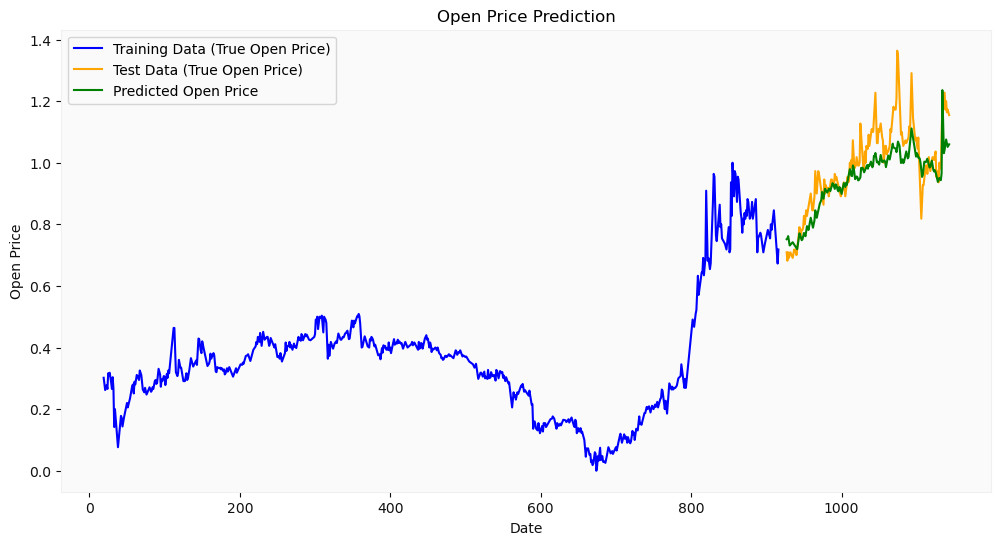

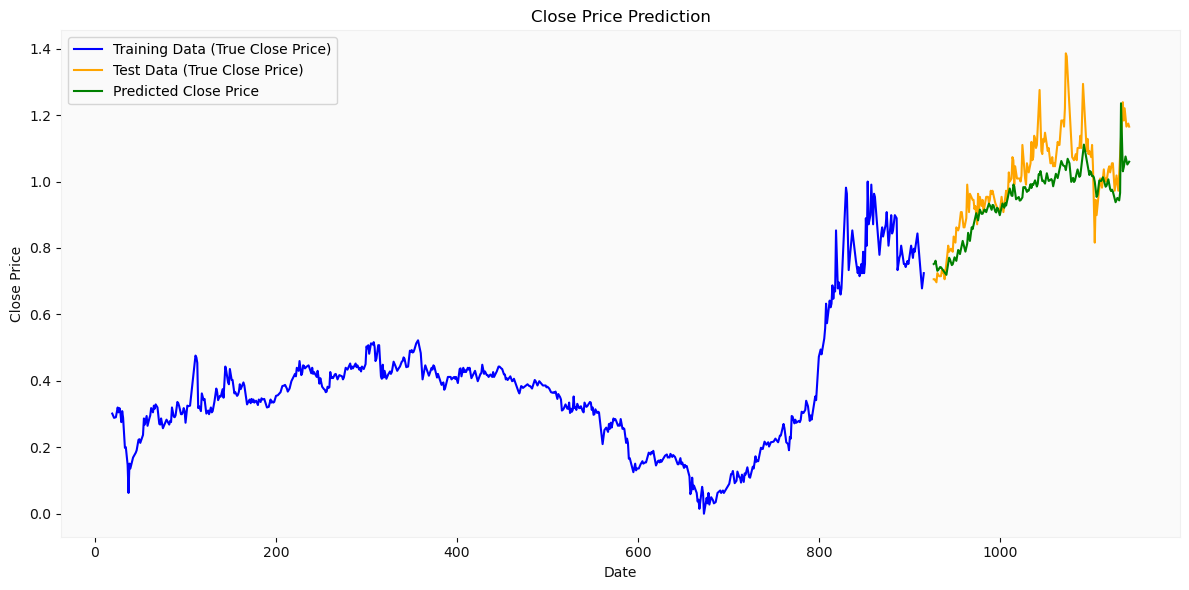

In [32]:
train_data = results["data"]["train_data"]
test_data = results["data"]["test_data"]
X_train = results["data"]["X_train"]

# 繪製開盤價和收盤價的預測結果
plot_open_and_close_price_results(
    y_train_open=results["y_train"]["y_train_open"],
    y_test_open=results["y_test"]["y_test_open"],
    y_pred_open=results["y_pred"]["y_pred_open"],
    y_train_close=results["y_train"]["y_train_close"],
    y_test_close=results["y_test"]["y_test_close"],
    y_pred_close=results["y_pred"]["y_pred_open"],
    train_data=train_data[:len(X_train)],
    test_data=test_data[:len(results["y_test"]["y_test_open"])]
)


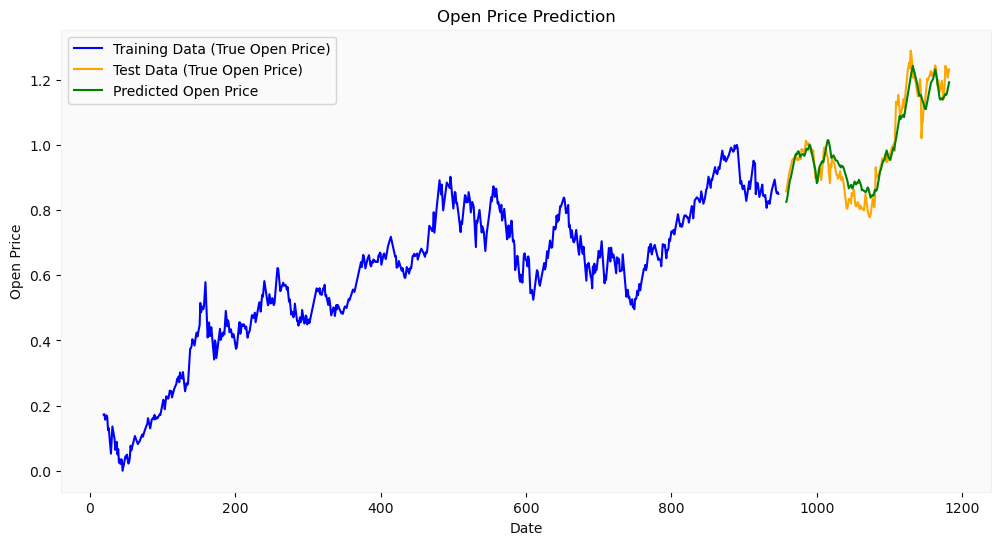

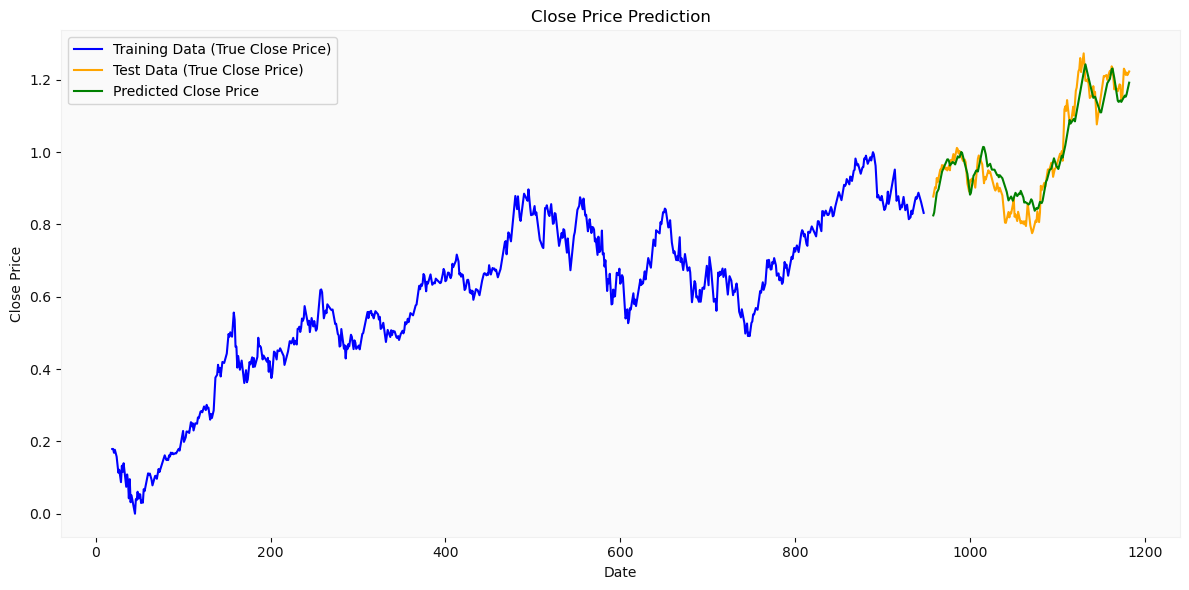

In [33]:
train_data_yahoo = results_yahoo["data"]["train_data"]
test_data_yahoo = results_yahoo["data"]["test_data"]
X_train_yahoo = results_yahoo["data"]["X_train"]

# 繪製開盤價和收盤價的預測結果
plot_open_and_close_price_results(
    y_train_open=results_yahoo["y_train"]["y_train_open"],
    y_test_open=results_yahoo["y_test"]["y_test_open"],
    y_pred_open=results_yahoo["y_pred"]["y_pred_open"],
    y_train_close=results_yahoo["y_train"]["y_train_close"],
    y_test_close=results_yahoo["y_test"]["y_test_close"],
    y_pred_close=results_yahoo["y_pred"]["y_pred_open"],
    train_data=train_data_yahoo[:len(X_train_yahoo)],
    test_data=test_data_yahoo[:len(results_yahoo["y_test"]["y_test_open"])]
)
